**Arboles de Decision - TAREA 5 BY JUAN MANUEL GUTIERREZ ROJAS**

In [1]:
#Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [2]:
#Cargamos el dataset y las primeras cinco filas
data = pd.read_csv("Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Vemos la medida de los datos cargados
data.shape

(891, 12)

In [4]:
#Vemos las diferentes medidas estadisticas
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#Identificamos los valores nulos
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

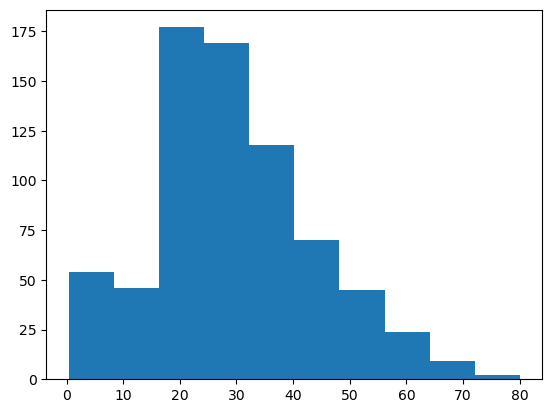

In [6]:
#Vemos un histograma de los elementos por cada clase
plt.hist(data.Age)

<Axes: xlabel='Age', ylabel='PassengerId'>

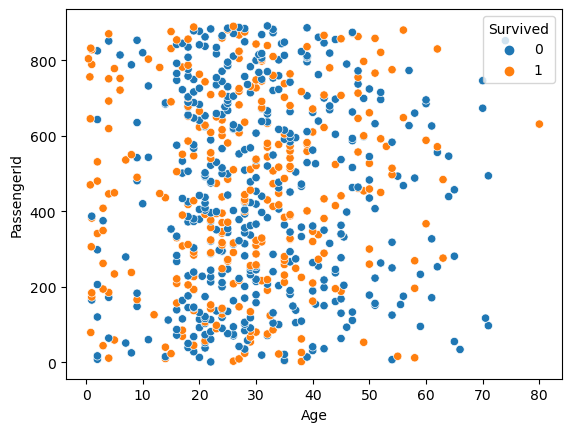

In [7]:
#Realizamos un diagrama de dispercion
sns.scatterplot(x = "Age", y = "PassengerId", hue = "Survived", data = data)

In [8]:
predictors_col = ["PassengerId", "Pclass", "SibSp", "Parch", "Fare"]
target_col = ['Survived']

In [9]:
predictors = data[predictors_col]
target = data[target_col]

In [10]:
predictors

,PassengerId,Pclass,SibSp,Parch,Fare
0,1,3,1,0,7.2500
1,2,1,1,0,71.2833
2,3,3,0,0,7.9250
3,4,1,1,0,53.1000
4,5,3,0,0,8.0500
...,...,...,...,...,...
886,887,2,0,0,13.0000
887,888,1,0,0,30.0000
888,889,3,1,2,23.4500
889,890,1,0,0,30.0000


In [11]:
target

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [12]:
#Hallamos la correlacion entre las variables predictoras
corr = predictors.corr()
corr

,PassengerId,Pclass,SibSp,Parch,Fare
PassengerId,1.000000,-0.035144,-0.057527,-0.001652,0.012658
Pclass,-0.035144,1.000000,0.083081,0.018443,-0.549500
SibSp,-0.057527,0.083081,1.000000,0.414838,0.159651
Parch,-0.001652,0.018443,0.414838,1.000000,0.216225
Fare,0.012658,-0.549500,0.159651,0.216225,1.000000


**Los cercanos a uno existe una alta correlacion directa, de lo contrario seria una correlacion inversa.**

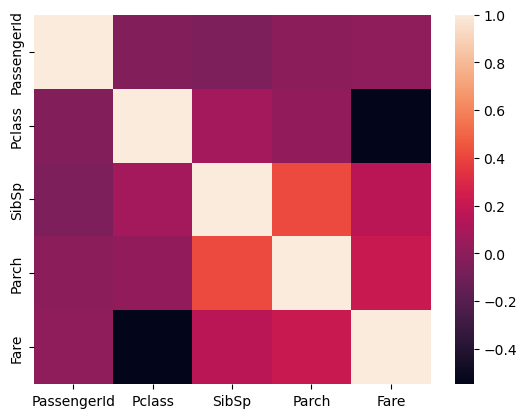

In [13]:
#Realizamos un mapa de calor
sns.heatmap(corr)
plt.show()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.23, random_state=13)

In [15]:
tree = DecisionTreeClassifier()

In [16]:
arbol = tree.fit(X_train, y_train)

[Text(0.5075886461318052, 0.9761904761904762, 'x[1] <= 2.5\ngini = 0.476\nsamples = 686\nvalue = [418, 268]'),
 Text(0.15884670487106017, 0.9285714285714286, 'x[4] <= 13.679\ngini = 0.496\nsamples = 317\nvalue = [145, 172]'),
 Text(0.03796561604584527, 0.8809523809523809, 'x[0] <= 129.5\ngini = 0.417\nsamples = 71\nvalue = [50, 21]'),
 Text(0.032234957020057305, 0.8333333333333334, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.04369627507163324, 0.8333333333333334, 'x[4] <= 7.75\ngini = 0.379\nsamples = 67\nvalue = [50, 17]'),
 Text(0.03796561604584527, 0.7857142857142857, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.0494269340974212, 0.7857142857142857, 'x[0] <= 266.0\ngini = 0.419\nsamples = 57\nvalue = [40, 17]'),
 Text(0.022922636103151862, 0.7380952380952381, 'x[0] <= 228.0\ngini = 0.219\nsamples = 16\nvalue = [14, 2]'),
 Text(0.017191977077363897, 0.6904761904761905, 'x[0] <= 224.5\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(0.011461318051575931, 0.64285714

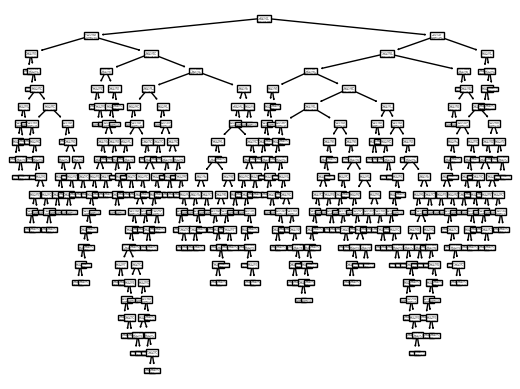

In [17]:
plot_tree(arbol)

In [18]:
predicciones = arbol.predict(X_test)

In [19]:
predicciones

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [20]:
#Ahora analizamos la matriz de confusion
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,0,1
Actual,,
0,100,31
1,32,42


In [21]:
#Analizamos la metrica, comparando los valores reales frente a las predicciones realizadas para hallar la exactitud del modelo.
accuracy = accuracy_score(y_test, predicciones)
accuracy

0.6926829268292682